In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family']='simhei'
mpl.rcParams['axes.unicode_minus']=False # 处理负号问题 
mpl.rcParams['font.size'] = 20.0

In [2]:
data=pd.read_csv('./gd1.csv')
data.head(1)

,Unnamed: 0,_id,address,area,area1,area2,direction,floor,followinfo,recommend,room,title,total_price,type,unit_Price,url
0,0,https://dg.lianjia.com/ershoufang/105101847557...,东城万达广场,183.62平米,东城区,世博广场,南,高楼层 (共30层),3人关注 / 共0次带看 / 2个月以前发布,东莞城区，欧式装修大4房，南北对流，看花园，安静，业主急卖,4室2厅1厨2卫,万达广场 电梯公寓 地铁东城站 交通购物方便 万达商圈,75,商品房,18579,https://dg.lianjia.com/ershoufang/105101662200...


In [3]:
data=data[data.type=='商品房']

In [4]:
data.head(1)

,Unnamed: 0,_id,address,area,area1,area2,direction,floor,followinfo,recommend,room,title,total_price,type,unit_Price,url
0,0,https://dg.lianjia.com/ershoufang/105101847557...,东城万达广场,183.62平米,东城区,世博广场,南,高楼层 (共30层),3人关注 / 共0次带看 / 2个月以前发布,东莞城区，欧式装修大4房，南北对流，看花园，安静，业主急卖,4室2厅1厨2卫,万达广场 电梯公寓 地铁东城站 交通购物方便 万达商圈,75,商品房,18579,https://dg.lianjia.com/ershoufang/105101662200...


In [5]:
groupby_area1=data.groupby(by='area1').count()['_id']

In [6]:
groupby_area1

area1
万江区      214
东坑镇       47
东城区      978
中堂镇        4
企石镇        2
凤岗镇      714
南城区     2019
厚街镇      549
塘厦镇      227
大岭山镇     168
大朗镇      406
寮步镇      616
常平镇       76
松山湖      505
樟木头镇     387
横沥镇       29
沙田镇       62
洪梅镇       76
清溪镇      112
石排镇        3
石龙镇       10
茶山镇        2
莞城区      175
虎门镇     1612
道滘镇      161
长安镇      434
高埗镇       16
麻涌镇       16
黄江镇       74
Name: _id, dtype: int64

In [7]:
groupby_area1=groupby_area1[groupby_area1>100]
groupby_area1=groupby_area1.sort_values(ascending=False)

In [8]:
area1_list=groupby_area1.index.tolist()
area1_list

['南城区',
 '虎门镇',
 '东城区',
 '凤岗镇',
 '寮步镇',
 '厚街镇',
 '松山湖',
 '长安镇',
 '大朗镇',
 '樟木头镇',
 '塘厦镇',
 '万江区',
 '莞城区',
 '大岭山镇',
 '道滘镇',
 '清溪镇']

In [9]:
concat_list=[]
for area in area1_list:
    concat_in=data[data.area1==area]
    concat_list.append(concat_in)
droped_data=pd.concat(concat_list)
droped_data=droped_data.reset_index(drop=True)
droped_data.head(1)

,Unnamed: 0,_id,address,area,area1,area2,direction,floor,followinfo,recommend,room,title,total_price,type,unit_Price,url
0,1071,https://dg.lianjia.com/ershoufang/105101899160...,香树丽舍,93.18平米,南城区,南城车站,东南,低楼层 (共28层),1人关注 / 共0次带看 / 14天以前发布,业主诚心出售，配套比较齐，交通方便，小区安保好！,3室2厅1厨2卫,香树丽舍 方正三房 通风采光佳 视野开阔 装修保养好,198,商品房,21250,https://dg.lianjia.com/ershoufang/105101899160...


## 上面获得了去掉二手房数量小于100的地区,然后重新排列,接下来可以对二手房的总价和单价进行条形图堆叠操作

In [10]:
max_unit=droped_data.unit_Price.max()/10000
min_unit=droped_data.unit_Price.min()/10000

In [11]:
top=math.ceil(max_unit)
low=math.floor(min_unit)

In [12]:
droped_data=droped_data.assign(unit_price=droped_data.unit_Price/10000)
droped_data.head(1)

,Unnamed: 0,_id,address,area,area1,area2,direction,floor,followinfo,recommend,room,title,total_price,type,unit_Price,url,unit_price
0,1071,https://dg.lianjia.com/ershoufang/105101899160...,香树丽舍,93.18平米,南城区,南城车站,东南,低楼层 (共28层),1人关注 / 共0次带看 / 14天以前发布,业主诚心出售，配套比较齐，交通方便，小区安保好！,3室2厅1厨2卫,香树丽舍 方正三房 通风采光佳 视野开阔 装修保养好,198,商品房,21250,https://dg.lianjia.com/ershoufang/105101899160...,2.125


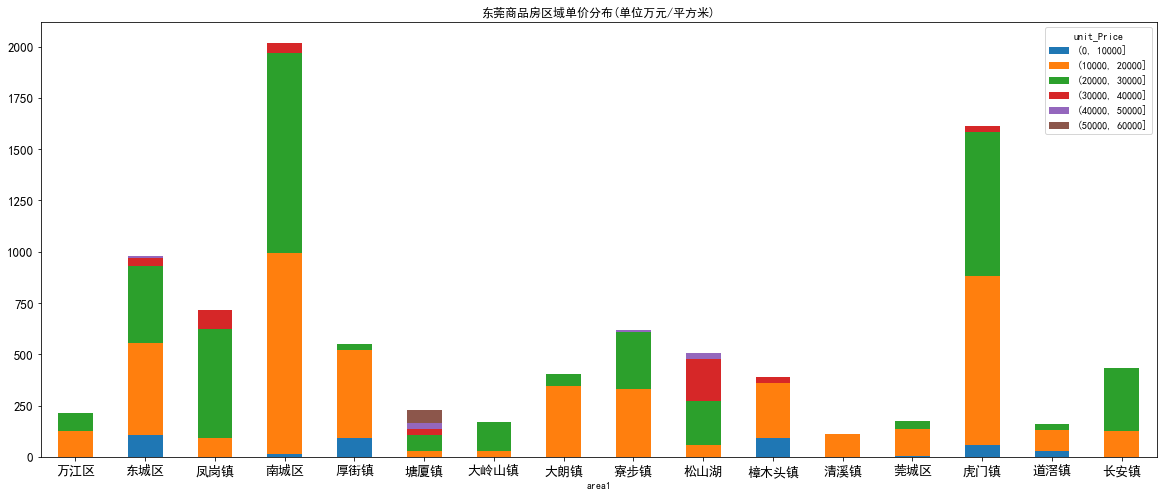

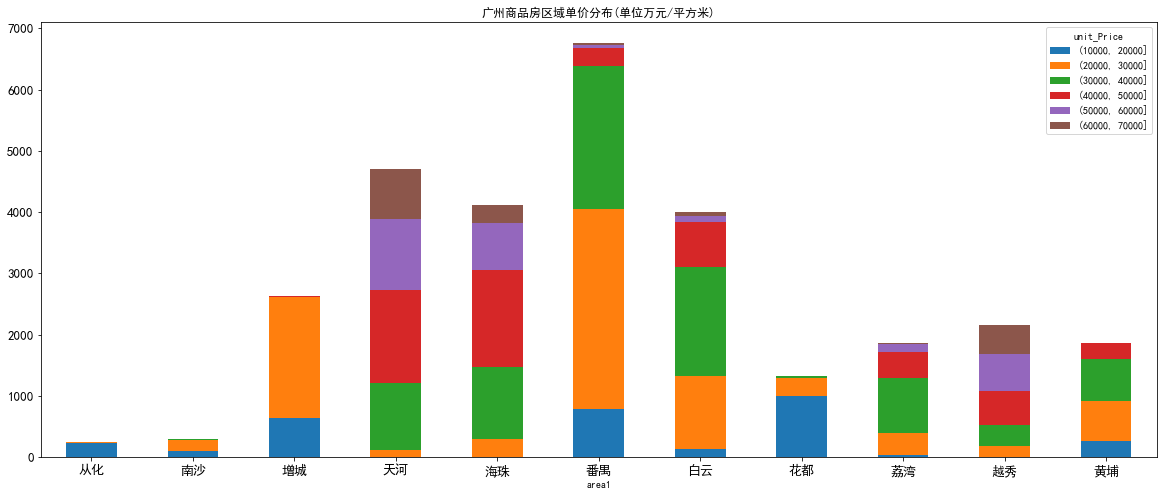

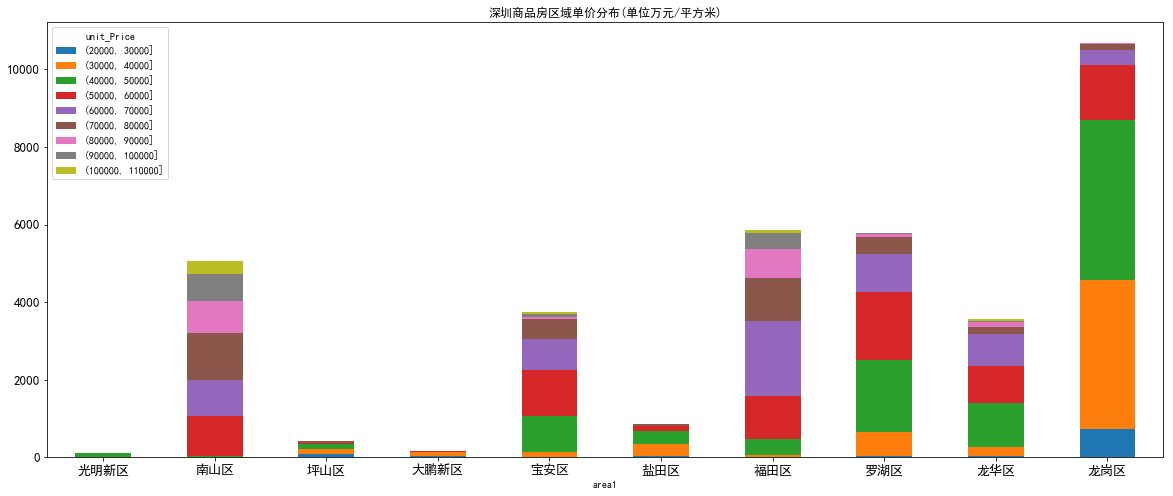

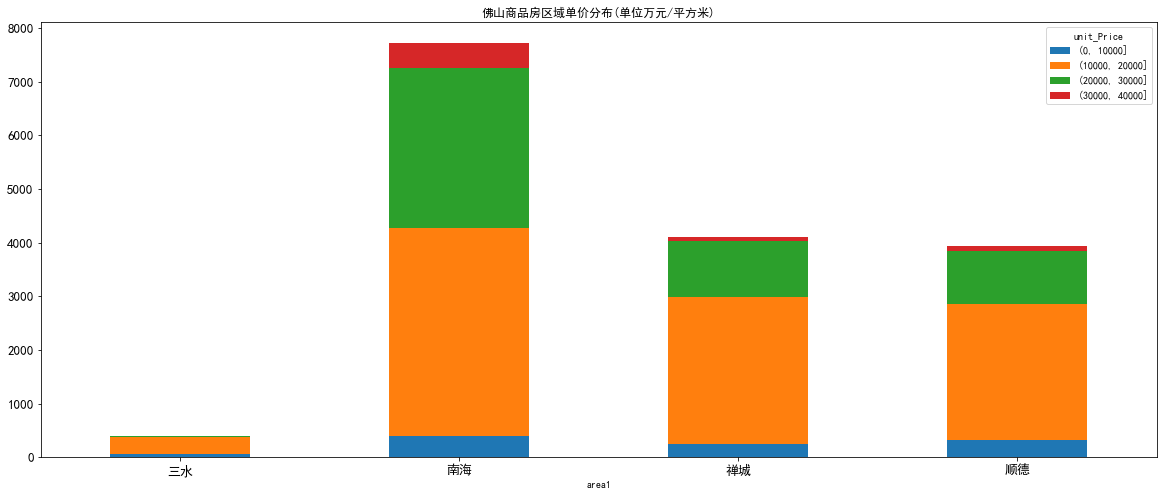

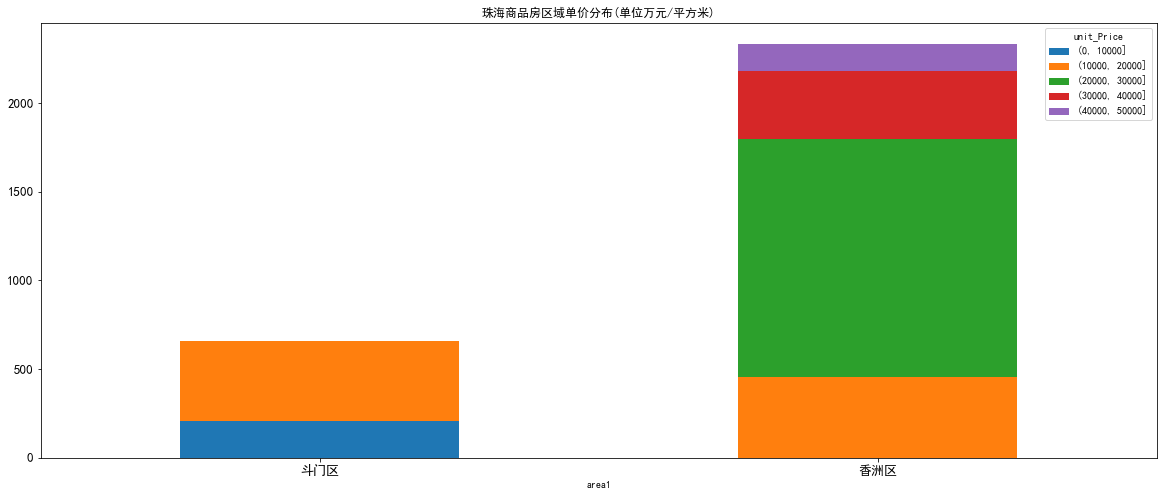

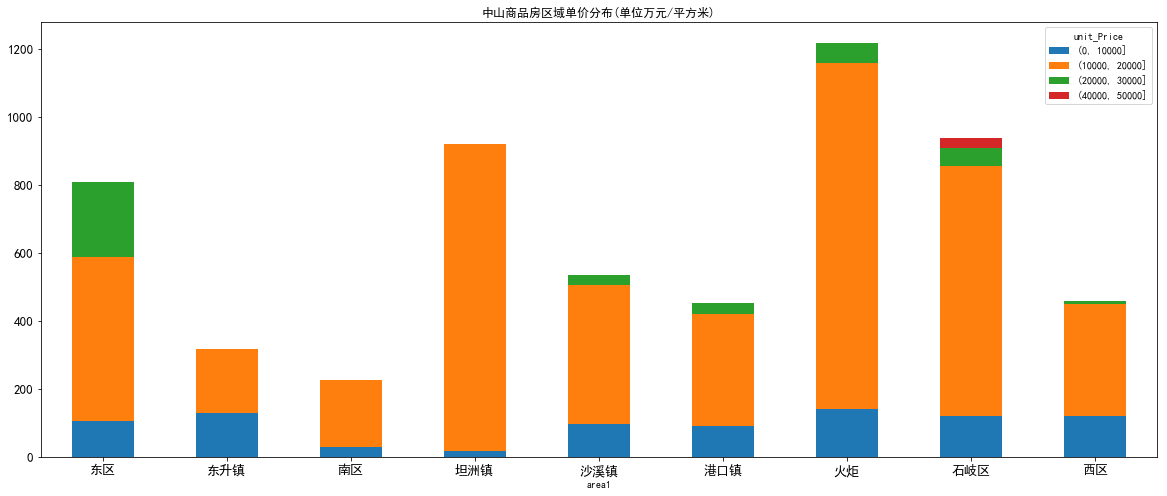

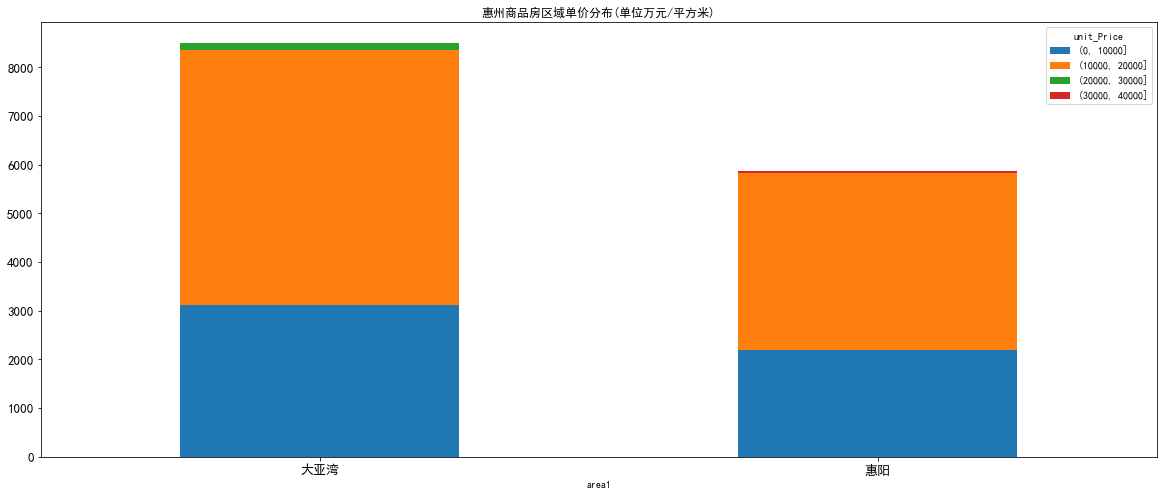

In [23]:
dict={'dg':'东莞','gz':'广州','sz':'深圳','fs':'佛山','zh':'珠海','zs':'中山','hui':'惠州'}
n=1
for i in dict:
    city=dict[i]
    data=pd.read_csv('./gd{}.csv'.format(n))
    data=data[data.type=='商品房']
    groupby_area1=data.groupby(by='area1').count()['_id']
    groupby_area1=groupby_area1[groupby_area1>100]
    groupby_area1=groupby_area1.sort_values(ascending=False)
    area1_list=groupby_area1.index.tolist()
    concat_list=[]
    for area in area1_list:
        concat_in=data[data.area1==area]
        concat_list.append(concat_in)
    droped_data=pd.concat(concat_list)
    droped_data=droped_data.reset_index(drop=True)
    max_unit=droped_data.unit_Price.max()/10000
    min_unit=droped_data.unit_Price.min()/10000
    top=math.ceil(max_unit)
    low=math.floor(min_unit)
    droped_data=droped_data.assign(unit_price=droped_data.unit_Price/10000)
    droped_data.head(1)

    bins=[]
    for i in range(low,top+1):
        bins.append(i)

    if len(bins)<10:
        bins=[i*10000 for i in bins]
        bins_data=pd.cut(droped_data.unit_Price,bins=bins)
        table=droped_data.pivot_table('unit_Price',index='area1',columns=bins_data,aggfunc='count')
        table.plot(kind='bar',stacked=True,figsize=(20,8),fontsize=13,width=0.5,rot=0)
        plt.title('%s商品房区域单价分布(单位万元/平方米)'%city)
        plt.savefig('%s.png'%city)
        plt.show()
        n+=1
    else:
        import re
        bins_data=pd.cut(droped_data.unit_price,bins=bins).value_counts()
        re_bins=[]
        bins_data=bins_data/bins_data.sum()
        bins_data=bins_data[bins_data>0.01]
        strlist=[]
        for i in bins_data.index.tolist():
            i=str(i)
            strlist.append(i)
        re_list=[]
        for i in strlist:
            j=re.findall('(\d+)',i)[0]
            re_list.append(j)
        for i in re_list:
            i=int(i)
            re_bins.append(i)
        re_bins=sorted(re_bins)
        re_bins=[i*10000 for i in re_bins]
        bins_data=pd.cut(droped_data.unit_Price,bins=re_bins)
        table=droped_data.pivot_table('unit_Price',index='area1',columns=bins_data,aggfunc='count')
        table.plot(kind='bar',stacked=True,figsize=(20,8),fontsize=13,width=0.5,rot=0)
        plt.title('%s商品房区域单价分布(单位万元/平方米)'%city)
        plt.savefig('%s.png'%city)
        plt.show()
        n+=1